<a href="https://colab.research.google.com/github/ShreyasLengade/GeneticAlgorithms/blob/main/10_Genetic_Algorithms_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The One-Max Problem (1)

In [ ]:
import random
import matplotlib.pyplot as plt

pop_size = 100
num_generations = 100
mutation_rate = 0.001
string_length = 20

best_sol = None
best_value = 0
average_values = []
best_values = []

In [ ]:
# 1. Initialize population and compute fitness of each sol in pop
def fitness_function(sol):
    return sum(sol)

population = [random.choices([0, 1], k=string_length) for _ in range(pop_size)]
fitness_values = [fitness_function(sol) for sol in population]

# 2. Mutate function for One-Max problem
def mutate(sol):
    mutated_sol = list(sol)
    for i in range(len(mutated_sol)):
        if random.random() < mutation_rate:
            mutated_sol[i] = 1 - mutated_sol[i]
    return mutated_sol

In [ ]:
# 3. Evolve the population
for generation in range(num_generations):

    # 3a. Select parents using roulette wheel selection
    parents = random.choices(population, weights=fitness_values, k=pop_size)

    # 3b. Create new generation through crossover and mutation
    children = []
    for i in range(0, pop_size, 2):
        parent1, parent2 = parents[i], parents[i + 1]
        crossover_point = random.randint(1, string_length - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        children.extend([mutate(child1), mutate(child2)])

    # 3c. Replace old population with new generation for the next iteration
    population = children

    # 3d. Evaluate fitness for each solution in pop
    fitness_values = [fitness_function(sol) for sol in population]

    # 3e. Return the best sol in the current generation
    best_index = fitness_values.index(max(fitness_values))
    gen_best_sol = population[best_index]
    gen_best_value = fitness_values[best_index]
    # 3f. Update best_global_sol if appropriate
    if gen_best_value > best_value:
        best_sol = population[best_index]
        best_value = gen_best_value
        print(f"New best value: {best_value}")

    # 3g. Compute average value of the current generation and update lists
    average_value = sum(fitness_values) / len(fitness_values)
    average_values.append(average_value)
    best_values.append(best_value)

# 4. Print best solution and its fitness
print(f"Best sol: {best_sol}")

New best value: 16
New best value: 17
New best value: 19
New best value: 20
Best sol: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


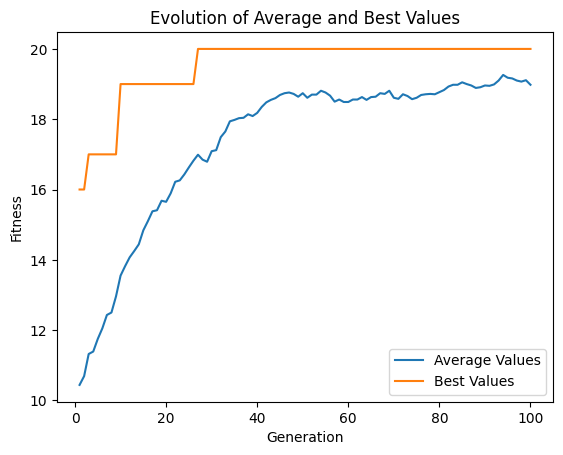

In [ ]:
# 5. Plot average and best fitness over generations
generations = list(range(1, num_generations + 1))
plt.plot(generations, average_values, label="Average Values")
plt.plot(generations, best_values, label="Best Values")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution of Average and Best Values")
plt.legend()
# plt.grid(both=True)
plt.show()

# The One-Max Problem (2)

In [ ]:
''' A DEAP Genetic Algorithm for the basic One-Max problem '''

from deap import base, creator, tools, algorithms
import array
import random
import numpy
import matplotlib.pyplot as plt

# GA parameters
pop_size = 100
num_generations = 50
crossover_rate = 0.9
mutation_rate = 0.1
string_length = 20
tourn_size = 3
hof_size = 5

# Create fitness functions and individuals
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# Define the toolbox
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual,
    toolbox.attr_bool, string_length)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation of a solution
def evalOneMax(individual):
    return sum(individual),

# Register elements
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
toolbox.register("select", tools.selTournament, tournsize=tourn_size)

pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(hof_size)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=crossover_rate, mutpb=mutation_rate,
    ngen=num_generations, stats=stats, halloffame=hof, verbose=True)

# Extract statistics from the log
gen_avg_fitness = log.select("avg")
gen_best_fitness = log.select("max")

gen	nevals	avg 	std    	min	max
0  	100   	9.95	2.42229	5  	15 
1  	97    	12.14	1.89747	8  	16 
2  	94    	13.78	1.68867	8  	18 
3  	95    	14.88	1.62653	11 	18 
4  	96    	15.91	1.36451	11 	19 
5  	90    	16.68	1.24   	12 	20 
6  	96    	17.5 	1.03441	15 	20 
7  	82    	18.2 	0.894427	15 	20 
8  	92    	18.61	1.05731 	16 	20 
9  	84    	19.2 	1.02956 	14 	20 
10 	91    	19.62	0.946361	14 	20 
11 	94    	19.85	0.739932	14 	20 
12 	93    	19.67	0.990505	15 	20 
13 	87    	19.81	0.658711	16 	20 
14 	88    	19.66	0.907965	16 	20 
15 	86    	19.82	0.712461	16 	20 
16 	93    	19.77	0.732871	16 	20 
17 	95    	19.81	0.643351	17 	20 
18 	96    	19.66	0.8743  	16 	20 
19 	91    	19.79	0.72519 	16 	20 
20 	94    	19.81	0.820914	15 	20 
21 	90    	19.92	0.523068	15 	20 
22 	94    	19.78	0.807217	15 	20 
23 	84    	19.76	0.776144	16 	20 
24 	88    	19.74	0.832106	16 	20 
25 	87    	19.72	0.928224	14 	20 
26 	85    	19.8 	0.748331	16 	20 
27 	98    	19.77	0.772722	16 	20 
28 	82    	19.72	0.83761

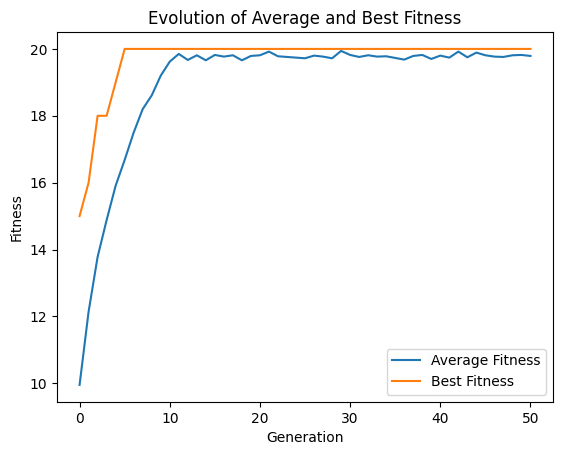

In [ ]:
# Plot the evolution of average and best fitness over generations
generations = list(range(0, num_generations+1))
plt.plot(generations, gen_avg_fitness, label="Average Fitness")
plt.plot(generations, gen_best_fitness, label="Best Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution of Average and Best Fitness")
plt.legend()
plt.show()

# Fine Tune Analysis

## Population Size Fine Tuning

gen	nevals	avg	std   	min	max
0  	10    	9.3	2.2383	5  	13 
1  	8     	11.8	1.53623	8  	13 
2  	8     	12.8	0.4    	12 	13 
3  	8     	12.8	0.6    	11 	13 
4  	8     	12.8	0.6    	11 	13 
5  	6     	12.8	0.6    	11 	13 
6  	10    	13.2	0.4    	13 	14 
7  	10    	13.6	0.916515	12 	15 
8  	8     	14.3	0.781025	13 	15 
9  	10    	15  	0.632456	14 	16 
10 	10    	14.9	0.830662	13 	16 
11 	10    	15.6	0.8     	14 	17 
12 	10    	15.7	0.781025	14 	17 
13 	10    	16.3	0.458258	16 	17 
14 	8     	16  	1.48324 	12 	17 
15 	10    	16.9	0.3     	16 	17 
16 	10    	17  	0       	17 	17 
17 	10    	16.9	0.3     	16 	17 
18 	10    	16.8	0.6     	15 	17 
19 	10    	17  	0       	17 	17 
20 	10    	16.8	0.6     	15 	17 
21 	8     	17  	0       	17 	17 
22 	10    	16.8	0.4     	16 	17 
23 	8     	17  	0       	17 	17 
24 	10    	17  	0       	17 	17 
25 	10    	16.9	0.3     	16 	17 
26 	10    	16.9	0.3     	16 	17 
27 	10    	17  	0       	17 	17 
28 	10    	17  	0       	17 	17 
29 	8     	16.9	0.3   

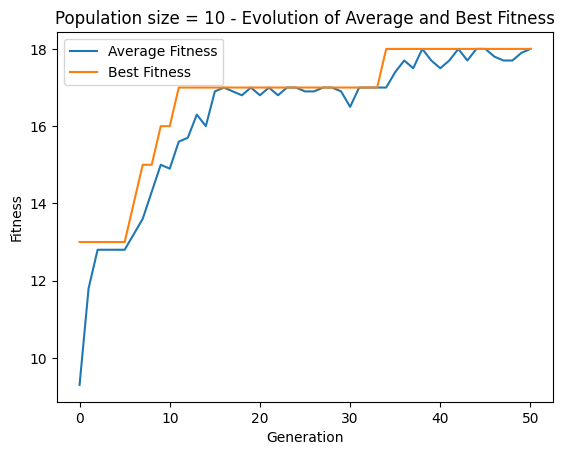

In [ ]:
''' A DEAP Genetic Algorithm for the basic One-Max problem '''

from deap import base, creator, tools, algorithms
import array
import random
import numpy
import matplotlib.pyplot as plt

# GA parameters
pop_size = 10
num_generations = 50
crossover_rate = 0.9
mutation_rate = 0.1
string_length = 20
tourn_size = 3
hof_size = 5

# Create fitness functions and individuals
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# Define the toolbox
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual,
    toolbox.attr_bool, string_length)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation of a solution
def evalOneMax(individual):
    return sum(individual),

# Register elements
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
toolbox.register("select", tools.selTournament, tournsize=tourn_size)

pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(hof_size)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=crossover_rate, mutpb=mutation_rate,
    ngen=num_generations, stats=stats, halloffame=hof, verbose=True)

# Extract statistics from the log
gen_avg_fitness = log.select("avg")
gen_best_fitness = log.select("max")

# Plot the evolution of average and best fitness over generations
generations = list(range(0, num_generations+1))
plt.plot(generations, gen_avg_fitness, label="Average Fitness")
plt.plot(generations, gen_best_fitness, label="Best Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Population size = " + str(pop_size) + " - Evolution of Average and Best Fitness")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg  	std    	min	max
0  	100   	10.03	2.45949	5  	16 
1  	84    	11.91	1.94471	7  	16 
2  	98    	13.83	1.80585	8  	18 
3  	90    	15.07	1.4509 	11 	18 
4  	91    	16.16	1.44028	12 	19 
5  	93    	17.25	1.252  	12 	20 
6  	87    	18.07	0.951367	14 	20 
7  	92    	18.61	0.881986	15 	20 
8  	91    	18.98	0.948472	15 	20 
9  	96    	19.49	0.741552	17 	20 
10 	96    	19.7 	0.932738	14 	20 
11 	95    	19.89	0.563826	16 	20 
12 	92    	19.85	0.589491	17 	20 
13 	90    	19.76	0.788923	16 	20 
14 	92    	19.75	0.829156	16 	20 
15 	88    	19.91	0.449333	17 	20 
16 	92    	19.88	0.534416	16 	20 
17 	86    	19.8 	0.748331	16 	20 
18 	92    	19.81	0.70278 	16 	20 
19 	88    	19.75	0.698212	17 	20 
20 	94    	19.83	0.566657	17 	20 
21 	93    	19.83	0.707884	15 	20 
22 	89    	19.82	0.683813	16 	20 
23 	97    	19.83	0.664154	16 	20 
24 	87    	19.81	0.783518	15 	20 
25 	93    	19.79	0.752263	16 	20 
26 	94    	19.76	0.736478	16 	20 
27 	88    	19.67	0.927955	15 	20 
28 	88    	19.84	0.73

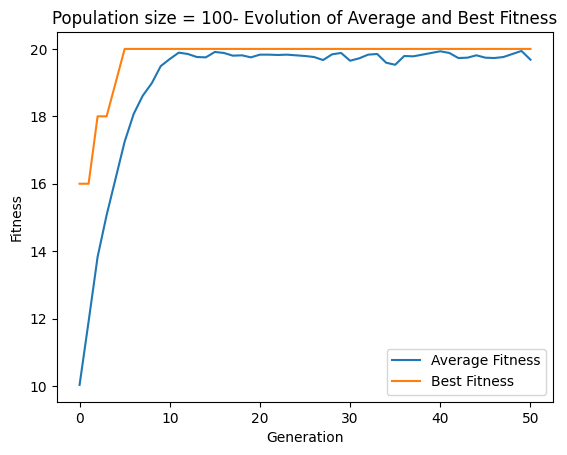

In [ ]:
''' A DEAP Genetic Algorithm for the basic One-Max problem '''

from deap import base, creator, tools, algorithms
import array
import random
import numpy
import matplotlib.pyplot as plt

# GA parameters
pop_size = 100
num_generations = 50
crossover_rate = 0.9
mutation_rate = 0.1
string_length = 20
tourn_size = 3
hof_size = 5

# Create fitness functions and individuals
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# Define the toolbox
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual,
    toolbox.attr_bool, string_length)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation of a solution
def evalOneMax(individual):
    return sum(individual),

# Register elements
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
toolbox.register("select", tools.selTournament, tournsize=tourn_size)

pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(hof_size)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=crossover_rate, mutpb=mutation_rate,
    ngen=num_generations, stats=stats, halloffame=hof, verbose=True)

# Extract statistics from the log
gen_avg_fitness = log.select("avg")
gen_best_fitness = log.select("max")

# Plot the evolution of average and best fitness over generations
generations = list(range(0, num_generations+1))
plt.plot(generations, gen_avg_fitness, label="Average Fitness")
plt.plot(generations, gen_best_fitness, label="Best Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Population size = " + str(pop_size) + "- Evolution of Average and Best Fitness")
plt.legend()
plt.show()

gen	nevals	avg   	std    	min	max
0  	500   	10.026	2.16086	4  	18 
1  	453   	11.694	1.92051	6  	17 
2  	461   	13.212	1.69678	7  	18 
3  	456   	14.576	1.5415 	9  	19 
4  	447   	15.736	1.42067	12 	20 
5  	446   	16.722	1.40453	12 	20 
6  	462   	17.774	1.21282	13 	20 
7  	446   	18.516	1.22382	12 	20 
8  	452   	19.226	0.887087	14 	20 
9  	440   	19.642	0.796138	14 	20 
10 	454   	19.792	0.748823	13 	20 
11 	451   	19.768	0.847453	14 	20 
12 	463   	19.8  	0.74027 	15 	20 
13 	448   	19.776	0.760147	15 	20 
14 	457   	19.78 	0.729109	15 	20 
15 	451   	19.754	0.854098	13 	20 
16 	463   	19.842	0.636424	15 	20 
17 	469   	19.75 	0.873785	12 	20 
18 	440   	19.814	0.671866	15 	20 
19 	461   	19.816	0.741717	14 	20 
20 	457   	19.8  	0.734847	14 	20 
21 	458   	19.8  	0.745654	13 	20 
22 	460   	19.788	0.768802	14 	20 
23 	454   	19.79 	0.765441	14 	20 
24 	462   	19.846	0.591848	16 	20 
25 	445   	19.806	0.695963	14 	20 
26 	452   	19.832	0.644807	16 	20 
27 	459   	19.828	0.700297	13

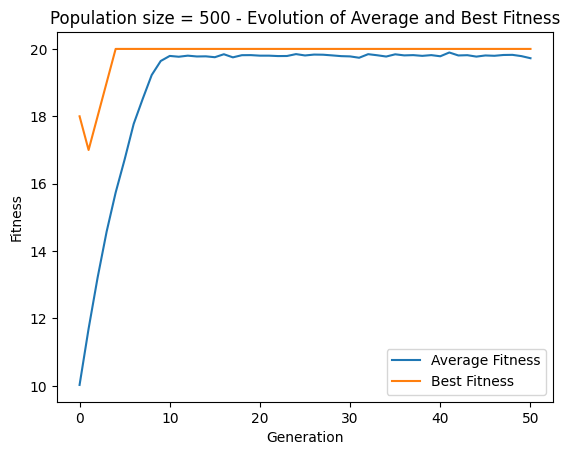

In [ ]:
''' A DEAP Genetic Algorithm for the basic One-Max problem '''

from deap import base, creator, tools, algorithms
import array
import random
import numpy
import matplotlib.pyplot as plt

# GA parameters
pop_size = 500
num_generations = 50
crossover_rate = 0.9
mutation_rate = 0.1
string_length = 20
tourn_size = 3
hof_size = 5

# Create fitness functions and individuals
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# Define the toolbox
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual,
    toolbox.attr_bool, string_length)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation of a solution
def evalOneMax(individual):
    return sum(individual),

# Register elements
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
toolbox.register("select", tools.selTournament, tournsize=tourn_size)

pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(hof_size)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=crossover_rate, mutpb=mutation_rate,
    ngen=num_generations, stats=stats, halloffame=hof, verbose=True)

# Extract statistics from the log
gen_avg_fitness = log.select("avg")
gen_best_fitness = log.select("max")

# Plot the evolution of average and best fitness over generations
generations = list(range(0, num_generations+1))
plt.plot(generations, gen_avg_fitness, label="Average Fitness")
plt.plot(generations, gen_best_fitness, label="Best Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Population size = " + str(pop_size) + " - Evolution of Average and Best Fitness")
plt.legend()
plt.show()

gen	nevals	avg  	std    	min	max
0  	1000  	9.979	2.26419	3  	17 
1  	910   	11.84	1.81119	6  	17 
2  	902   	13.321	1.60747	8  	18 
3  	906   	14.579	1.54976	7  	19 
4  	891   	15.656	1.50322	10 	19 
5  	911   	16.714	1.33799	10 	20 
6  	921   	17.581	1.28586	11 	20 
7  	934   	18.413	1.14212	13 	20 
8  	924   	19.044	1.04214	14 	20 
9  	914   	19.547	0.854278	13 	20 
10 	901   	19.756	0.795276	15 	20 
11 	912   	19.812	0.732568	14 	20 
12 	912   	19.797	0.748192	13 	20 
13 	911   	19.815	0.677329	15 	20 
14 	919   	19.767	0.78912 	15 	20 
15 	919   	19.805	0.696401	14 	20 
16 	908   	19.781	0.768791	14 	20 
17 	896   	19.748	0.862842	14 	20 
18 	913   	19.844	0.624231	15 	20 
19 	929   	19.788	0.763581	13 	20 
20 	910   	19.805	0.710616	11 	20 
21 	927   	19.815	0.718871	14 	20 
22 	910   	19.81 	0.689855	14 	20 
23 	908   	19.818	0.72033 	14 	20 
24 	891   	19.838	0.624304	14 	20 
25 	900   	19.765	0.762742	15 	20 
26 	888   	19.833	0.665666	14 	20 
27 	906   	19.79 	0.718262	15 	20

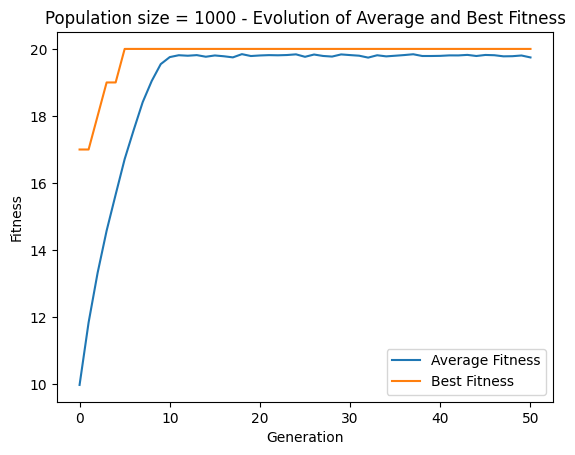

In [ ]:
''' A DEAP Genetic Algorithm for the basic One-Max problem '''

from deap import base, creator, tools, algorithms
import array
import random
import numpy
import matplotlib.pyplot as plt

# GA parameters
pop_size = 1000
num_generations = 50
crossover_rate = 0.9
mutation_rate = 0.1
string_length = 20
tourn_size = 3
hof_size = 5

# Create fitness functions and individuals
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# Define the toolbox
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual,
    toolbox.attr_bool, string_length)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation of a solution
def evalOneMax(individual):
    return sum(individual),

# Register elements
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
toolbox.register("select", tools.selTournament, tournsize=tourn_size)

pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(hof_size)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=crossover_rate, mutpb=mutation_rate,
    ngen=num_generations, stats=stats, halloffame=hof, verbose=True)

# Extract statistics from the log
gen_avg_fitness = log.select("avg")
gen_best_fitness = log.select("max")

# Plot the evolution of average and best fitness over generations
generations = list(range(0, num_generations+1))
plt.plot(generations, gen_avg_fitness, label="Average Fitness")
plt.plot(generations, gen_best_fitness, label="Best Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Population size = " + str(pop_size) + " - Evolution of Average and Best Fitness")
plt.legend()
plt.show()

# The Knapsack Problem


In [1]:
import random
import matplotlib.pyplot as plt

# 0a. Input data for the Knapsack problem
max_capacity = 400 # max weight allowed in knapsack
filename = 'tourist.txt'
items = []
with open(filename, 'r') as file:
    for line in file:
        weight, value = map(int, line.strip().split())
        items.append({"weight": weight, "value": value})

# 0b. Set GA parameters
population_size = 50
num_generations = 200
mutation_rate = 0.1 # probability of mutation
isRoulette = False # if False, it uses the tournament selection procedure
tournament_size = 3 # in case tournament method is used
isOnePoint = False # if False, it uses the two-point crossover
elite_count = int(0.05 * population_size) # number of elite solutions to preserve

# 0c. Initialize key variables
best_sol = None # configuration of the best overall sol
best_value = 0 # value of the best overall sol
average_values = [] # list of average values at each generation
best_values = [] # list of best values at each generation

# 1a. Initialize population (list of sols, each sol being a k-dim vector of 0s and 1s)
population = [random.choices([0, 1], k=len(items)) for _ in range(population_size)]
fitness_values = []
for sol in population:
    total_weight = sum(items[i]["weight"] for i, bit in enumerate(sol) if bit)
    if total_weight > max_capacity:  # infeasible sol
        fitness_values.append(0)
    else:
        fitness_values.append(sum(items[i]["value"] for i, bit in enumerate(sol) if bit))

def selection(population, fitness_values, k, isRoulette):
    if isRoulette:  # select k parents with prob. selection proportional to fitness
        parents = random.choices(population, weights=fitness_values, k=k)
        return parents
    else:  # select k parents using a tournament selection process
        parents = []
        for _ in range(k):
            tournament_candidates = random.sample(range(len(population)), tournament_size)
            tournament_fitness = [fitness_values[i] for i in tournament_candidates]
            winner_index = tournament_candidates[tournament_fitness.index(max(tournament_fitness))]
            parents.append(population[winner_index])
        return parents

def crossover(parent1, parent2):
    if isOnePoint:  # one-point crossover
        split_point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:split_point] + parent2[split_point:]
        child2 = parent2[:split_point] + parent1[split_point:]
        return child1, child2
    else:  # two-point crossover
        point1 = random.randint(1, len(parent1) - 1)
        point2 = random.randint(point1, len(parent1) - 1)
        child1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
        child2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]
        return child1, child2

def mutate(chromosome):
    mutated_chromosome = list(chromosome)
    for i in range(len(mutated_chromosome)):
        if random.random() < mutation_rate:
            mutated_chromosome[i] = 1 - mutated_chromosome[i]
    return mutated_chromosome

# Evolve the population for specified number of generations
for generation in range(num_generations):
    # Select k parents for crossover, either using roulette or tournament
    elite_indices = sorted(range(len(fitness_values)), key=lambda i: fitness_values[i], reverse=True)[:elite_count]
    elite_solutions = [population[i] for i in elite_indices]

    non_elite_parents = selection(population, fitness_values, population_size - elite_count, isRoulette)
    parents = elite_solutions + non_elite_parents

    # Create new generation through crossover and mutation
    children = elite_solutions  # Preserve elite solutions
    for i in range(0, population_size - elite_count, 2):
        child1, child2 = crossover(parents[i], parents[i + 1])
        children.append(mutate(child1))
        children.append(mutate(child2))

    # Replace old population with new generation
    population = children

    # Evaluate fitness for each solution
    fitness_values = []
    for sol in population:
        total_weight = sum(items[i]["weight"] for i, bit in enumerate(sol) if bit)
        if total_weight > max_capacity:  # infeasible sol
            fitness_values.append(0)
        else:
            fitness_values.append(sum(items[i]["value"] for i, bit in enumerate(sol) if bit))

    # 3e. Return the best sol in the current generation
    best_index = fitness_values.index(max(fitness_values))
    gen_best_sol = population[best_index]
    gen_best_value = fitness_values[best_index]
    print(f"Generation {generation+1}: Best value in gen = {gen_best_value}")

    # 3f. Update best global sol if appropriate
    if gen_best_value > best_value:
        best_sol = population[best_index]
        best_value = gen_best_value

    # 3g. Compute average value of the current generation and update lists
    average_value = sum(fitness_values) / len(fitness_values)
    average_values.append(average_value)
    best_values.append(best_value)

    # 4. Print configuration and value of the best sol found during the entire search
    print(f"Best sol overall: {best_sol}")
    print(f"Best value overall: {best_value}")

# 5. Plot the average value and best value for each generation
generations = list(range(1, num_generations+1))
plt.plot(generations, average_values, label="Average Value")
plt.plot(generations, best_values, label="Best Value")
plt.xlabel("Generation")
plt.ylabel("Value")
plt.title("Evolution of Average and Best Values")
plt.legend()
plt.ylim(bottom=0)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'tourist.txt'

# The Portfolio Optimization Problem

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMinimize' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


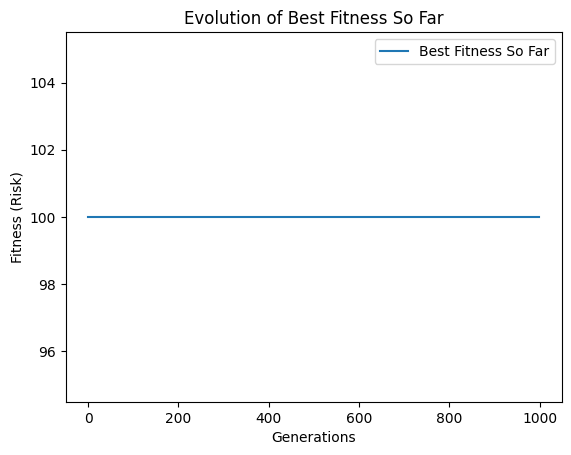

In [ ]:
''' A DEAP GA with Restart and HoF for the Portfolio Opt. Problem @ Angel A. Juan '''

import random
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Read input data
file_path = 'rpop_data_1.txt'
data = []
with open(file_path, 'r') as file:
    for line in file:
        if not line.startswith("#"):
            data.append(line.strip())

target_return = np.array(data[0].split(','), dtype=float)
expected_returns = np.array(data[1].split(','), dtype=float)
cov_matrix = np.array([row.split(',') for row in data[2:]], dtype=float)
n_assets = len(expected_returns)

# GA parameters
n_generations = 1000
restart_interval = 10  # number of generations before a restart
pop_size = 300
crossover_rate = 0.7
mutation_rate = 0.2  # prob. of mutation for each individual
gene_mutation_rate = 0.2  # prob. of mutation for each gene
tourn_size = 3
hof_size = 2
penalty = 100  # has to be large to discourage infeasible sols, but not too large

# Define the evaluation function with soft constraints and penalty cost
def evaluate_portfolio(individual):
    # Convert the individual (list) to a numpy array
    individual = np.array(individual)
    # Calculate portfolio return: x^T * R
    portfolio_return = np.dot(individual, expected_returns)
    # Calculate portfolio risk using matrix notation: x^T * C * x
    portfolio_risk = np.dot(np.dot(individual, cov_matrix), individual)
    # Constraint: sum of weights has to be approximately 1
    sum_of_weights_cons = 0  # if 0, no violation occurs
    if np.sum(individual) != 1.0: sum_of_weights_cons = 1
    # Constraint: ensure portfolio return is at least the target return
    return_cons = 0
    if portfolio_return < target_return: return_cons = 1
    # Constraint: the weight of each asset is bounded between 0.00 and 1.00
    weight_cons = 0
    if np.any(individual < 0.0) or np.any(individual > 1.0):
        weight_cons = 1

    # Apply a proportional penalty if some constraints are not met
    n_violations = sum_of_weights_cons + return_cons + weight_cons
    portfolio_risk += n_violations * penalty

    return portfolio_risk,

# Create the DEAP types and toolbox for single-objective optimization
creator.create("FitnessMinimize", base.Fitness, weights=(-1.0,)) # min risk
creator.create("Individual", list, fitness=creator.FitnessMinimize)
toolbox = base.Toolbox()

# Register gene initialization
toolbox.register("attr_float", random.uniform, 0.0, 1.0)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=n_assets)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define genetic operators, a Gaussian is used since genes are real numbers in [0,1]
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=gene_mutation_rate)
toolbox.register("select", tools.selTournament, tournsize=tourn_size)
toolbox.register("evaluate", evaluate_portfolio)

# Create a statistics object to collect data during evolution
stats = tools.Statistics(lambda ind: ind.fitness.values[0])
stats.register("min", np.min)

# Create a population
population = toolbox.population(n=pop_size)

# Create a Hall of Fame to store the best solutions
hof = tools.HallOfFame(hof_size)

# Run the evolution with restart using the standard genetic algorithm with statistics and Hall of Fame
gen_best_fitness = [] # List of best fitness values at each generation
for gen in range(1, n_generations + 1):
    # check if it is a restart point
    if gen % restart_interval == 0:
        # generate new individuals for the entire population except HoF
        new_population = []
        for _ in range(pop_size - hof_size):
            new_individual = toolbox.individual()
            new_population.append(new_individual)

        new_population.extend(hof)  # add solutions from the HoF
        # update the Hall of Fame with the best solutions so far
        hof.update(population)
        # replace the population with the newly generated individuals
        population = new_population
        # with each reset, we also modify crossover and mutation parameters
        crossover_rate = np.random.uniform(0.5, 1)
        mutation_rate = np.random.uniform(0.0, 0.5)
        gene_mutation_rate = random.uniform(0.0, 0.5)

    # Run the evolution using the standard genetic algorithm with statistics
    pop, log = algorithms.eaSimple(population, toolbox, cxpb=crossover_rate, mutpb=mutation_rate,
                                   ngen=1, stats=stats, halloffame=hof, verbose=False)
    gen_best_fitness.append(log.select("min"))

# Plot the evolution of feasible risks values over generations
plt.figure()
best_so_far = penalty
plotted_best_fitness = []
for gen_stats in gen_best_fitness:
    min_fitness = min(gen_stats)  # extract the min value from gen_stats
    best_so_far = min(best_so_far, min_fitness)
    # print(best_so_far)
    if best_so_far < penalty + 10:
        plotted_best_fitness.append(best_so_far)
    else:
        plotted_best_fitness.append(None)

plt.plot(plotted_best_fitness, label='Best Fitness So Far')
plt.xlabel('Generations')
plt.ylabel('Fitness (Risk)')
plt.legend()
plt.title('Evolution of Best Fitness So Far')
plt.show()


In [ ]:
# Print the best solution
best_solution = hof[0]
print("BestSol Weights:", [f"{weight:.3f}" for weight in best_solution])
print("Sum of Weights:", f"{sum(best_solution):.4f}")
print("BestSol Return:", f"{np.dot(best_solution, expected_returns):.4f}")
print("BestSol Risk:", f"{best_solution.fitness.values[0]:.6f}")

BestSol Weights: ['0.990', '0.058', '0.001']
Sum of Weights: 1.0492
BestSol Return: 1.1501
BestSol Risk: 100.012251


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Streaming output truncated to the last 5000 lines.
Infeasible individual detected: [0.07310445104945583, 0.32278822757920106, 0.7161552182326234], total weight: 1.1120478968612804
Infeasible individual detected: [0.4451929262511695, 0.0, 0.3455598558172549], total weight: 0.7907527820684244
Infeasible individual detected: [0.3119992053828289, 0.034302260569926746, 0.7454614382876069], total weight: 1.0917629042403625
Infeasible individual detected: [0.31488408645173366, 0.19849510010990515, -0.43716181256836023], total weight: 0.0762173739932786
Infeasible individual detected: [0.34664685434324105, 0.7578570797355212, 0.7307656084768641], total weight: 1.8352695425556262
Infeasible individual detected: [0.07371325927373662, 1.2185549082719385, 0.1898413623717643], total weight: 1.4821095299174394
Infeasible individual detected: [0.09394124465461726, 0.1782083521632513, 0.5863094686737546], total weight: 0.8584590654916231
Infeasible individual detected: [0.15159374533821623, 0.33589901

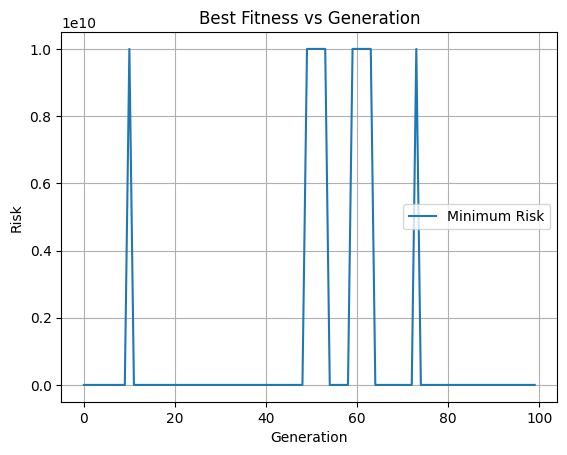

Best individual: [0.33967695281434324, 0.11379486770439937, 0.5465281794812574]
Best individual risk: 0.024121621728842673
Best individual return: 0.05004204121505324


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools

# Problem data
target_return = 0.050
returns = np.array([0.026002150277777348, 0.008101316405671459, 0.07371590949198982])
cov_matrix = np.array([
    [0.018641, 0.00359853, 0.00130976],
    [0.00359853, 0.00643694, 0.00488727],
    [0.00130976, 0.00488727, 0.0686828]
])

# Ensuring the covariance matrix is symmetric and non-negative
cov_matrix = (cov_matrix + cov_matrix.T) / 2
eigenvalues, _ = np.linalg.eigh(cov_matrix)
if np.any(eigenvalues < 0):
    print("Covariance matrix has negative eigenvalues; adjusting to make it positive semi-definite.")
    cov_matrix -= np.diag(np.minimum(eigenvalues, 0))

# Create the fitness and individual classes
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Define helper functions
def evaluate(individual):
    """Evaluate an individual's fitness (risk) while checking return constraint."""
    portfolio_return = np.dot(individual, returns)
    portfolio_variance = np.dot(individual, np.dot(cov_matrix, individual))

    # Ensure variance is real and non-negative
    if isinstance(portfolio_variance, complex) or portfolio_variance < 0:
        print(f"Complex or negative variance detected: {portfolio_variance}. Adjusting to zero.")
        portfolio_variance = 0.0

    if portfolio_return < target_return:
        return 1e10,  # Large penalty if target return is not met
    return portfolio_variance,

def feasible(individual):
    """Check if individual satisfies all constraints."""
    total_weight = sum(individual)
    if abs(total_weight - 1.0) >= 1e-6 or not all(0.0 <= x <= 1.0 for x in individual):
        print(f"Infeasible individual detected: {individual}, total weight: {total_weight}")
        return False
    return True

def generate_individual():
    """Generate a valid individual."""
    individual = np.random.dirichlet(np.ones(len(returns)), size=1)[0]
    return creator.Individual(individual.tolist())

def check_and_correct_complex(mutant):
    """Ensure all values in the mutant are real and in bounds."""
    for i in range(len(mutant)):
        if isinstance(mutant[i], complex):
            print(f"Complex value detected in mutant: {mutant[i]}. Setting to 0.0.")
            mutant[i] = 0.0
        elif mutant[i] < 0.0:
            print(f"Negative value detected in mutant: {mutant[i]}. Setting to 0.0.")
            mutant[i] = 0.0
        elif mutant[i] > 1.0:
            print(f"Value exceeding 1 detected in mutant: {mutant[i]}. Setting to 1.0.")
            mutant[i] = 1.0

# Define the Genetic Algorithm
toolbox = base.Toolbox()
toolbox.register("individual", generate_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 1e10))
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0.0, up=1.0, eta=20.0, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Parameters
population_size = 300
generations = 100
crossover_prob = 0.7
mutation_prob = 0.2
restart_threshold = 10  # Number of generations without improvement to trigger a restart

# Track statistics
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# Hall of Fame
hof = tools.HallOfFame(1)

# Genetic Algorithm with restarts
def genetic_algorithm_with_restart():
    population = toolbox.population(n=population_size)
    last_best = None
    stagnant_gens = 0
    logbook = tools.Logbook()

    for gen in range(generations):
        # Select and clone the next generation individuals
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < crossover_prob:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutation_prob:
                print(mutant)
                toolbox.mutate(mutant)
                check_and_correct_complex(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Replace the old population with the offspring
        population[:] = offspring

        # Update Hall of Fame
        hof.update(population)

        # Record statistics
        record = stats.compile(population)
        logbook.record(gen=gen, **record)
        print(logbook.stream)

        # Check for restart condition
        current_best = hof[0].fitness.values[0]
        if last_best is None or current_best < last_best:
            last_best = current_best
            stagnant_gens = 0
        else:
            stagnant_gens += 1

        if stagnant_gens >= restart_threshold:
            print("Restarting population...")
            population = toolbox.population(n=population_size)
            stagnant_gens = 0

    return population, logbook, hof

# Run the GA
population, logbook, hof = genetic_algorithm_with_restart()

# Plot the best fitness vs. generations
gen = logbook.select("gen")
fit_min = logbook.select("min")

plt.plot(gen, fit_min, label="Minimum Risk")
plt.xlabel("Generation")
plt.ylabel("Risk")
plt.title("Best Fitness vs Generation")
plt.legend()
plt.grid(True)
plt.show()

# Print the best solution
print(f"Best individual: {hof[0]}")
print(f"Best individual risk: {hof[0].fitness.values[0]}")
print(f"Best individual return: {np.dot(hof[0], returns)}")
